In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Suppress all warnings 
warnings.filterwarnings("ignore")


In [2]:
train_data = pd.read_csv("./data/train.csv")

In [3]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [5]:
train_data = train_data.drop("id", axis=1)

In [6]:
train_data.shape

(54273, 12)

In [7]:
train_data.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [8]:
# drop model column
train_data = train_data.drop("model", axis=1)

In [9]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [10]:
train_data.fuel_type.unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [11]:
# Replace '-' and notsupported values in fuel_type with 'Electric'
train_data.fuel_type.replace('–', 'Electric', inplace=True)

train_data.fuel_type.replace('not supported', 'Electric', inplace=True)

In [12]:
train_data.fuel_type.value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Electric            298
Plug-In Hybrid      182
Name: count, dtype: int64

In [13]:
import re
# Define a function to extract engine attributes

def extract_engine_features(engine_str):
    # Extract displacement
    displacement = re.search(r"(\d+\.\d+)L", engine_str)
    engine_displacement = float(displacement.group(1)) if displacement else None

    # Extract horsepower
    horsepower = re.search(r"(\d+\.\d+)HP", engine_str)
    engine_horsepower = float(horsepower.group(1)) if horsepower else None

    # # Extract number of cylinders
    # num_cylinders = re.search(r"\d+\s?Cylinder", engine_str)
    # num_cylinders = int(num_cylinders.group().split()[0]) if num_cylinders else None

    # # Extract cylinder configuration
    # cylinder_config = "V" if "V" in engine_str else "Straight" if "Straight" in engine_str else None

    # # # Extract fuel type
    # # fuel_type = re.search(r"(Gasoline|Diesel|Electric|Flex Fuel)", engine_str)
    # # fuel_type = fuel_type.group(1) if fuel_type else None

    return engine_displacement, engine_horsepower #, num_cylinders, cylinder_config

In [14]:
# Create two new features from the engine column 
train_data[['horsepower', 'engine_displacement']] = train_data.engine.apply(extract_engine_features).apply(pd.Series)

In [15]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,3.5,375.0
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,3.0,300.0
2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,4.2,300.0
3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,3.0,335.0
4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,3.8,200.0


In [16]:
train_data.horsepower.isnull().sum()

606

In [17]:
train_data.engine_displacement.isnull().sum()

4057

In [18]:
# Replace missing horsepower and displacement values with mean
train_data.horsepower.fillna(train_data.horsepower.mean(), inplace =True)
train_data.engine_displacement.fillna(train_data.engine_displacement.mean(), inplace=True)

In [19]:
train_data.horsepower.isnull().sum()

0

In [20]:
train_data.engine_displacement.isnull().sum()

0

In [21]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,3.5,375.0
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,3.0,300.0
2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,4.2,300.0
3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,3.0,335.0
4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,3.8,200.0


In [22]:
# drop engine column 
train_data.drop("engine", axis=1, inplace=True)


In [23]:
train_data.shape

(54273, 12)

In [24]:
# Getting car age 
train_data["age"] = 2024 - train_data.model_year

In [25]:
train_data.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement,age
0,Ford,2018,74349,Gasoline,10-Speed A/T,Blue,Gray,None reported,Yes,11000,3.5,375.0,6
1,BMW,2007,80000,Gasoline,6-Speed M/T,Black,Black,None reported,Yes,8250,3.0,300.0,17
2,Jaguar,2009,91491,Gasoline,6-Speed A/T,Purple,Beige,None reported,Yes,15000,4.2,300.0,15
3,BMW,2022,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,3.0,335.0,2
4,Pontiac,2001,111000,Gasoline,A/T,White,Black,None reported,Yes,7850,3.8,200.0,23


In [26]:
# Drop model year 
train_data.drop("model_year", axis=1, inplace=True)

> INSIGHTS 

* By the end of the data wrangling process these columns were dropped (`model_year`, `engine`, `model`)
* From the `engine` column the `horsepower` and `engine_displacement` were obtained.
* Car `age` was gotten from `model_year`

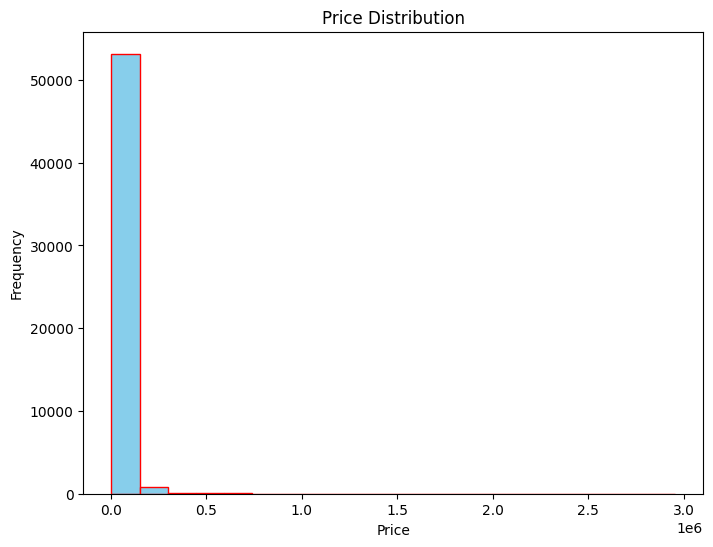

In [27]:
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.hist(train_data.price, bins=20, color='skyblue', edgecolor = 'red')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

 Above histogram shows the price of most cars lie in the lower range of prices



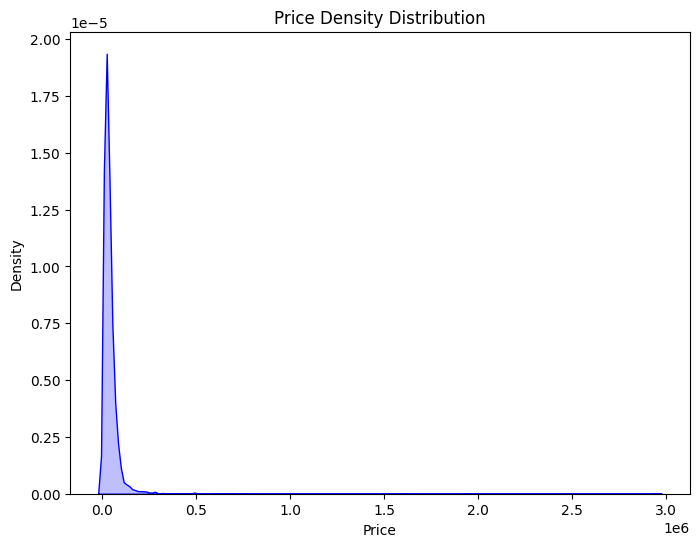

In [28]:
# plot figure to show density distribution 

plt.figure(figsize=(8, 6))
sns.kdeplot(train_data.price, color='blue', shade=True)
plt.title("Price Density Distribution")
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

The above distributions indicates a large amounts of outliers expecially above 0.5 on the price axis

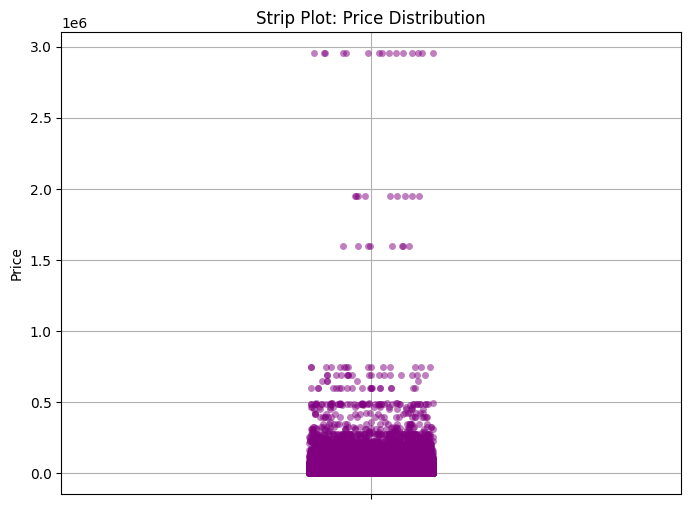

In [29]:
# Create a strip plot for the  `price` variable 
plt.figure(figsize=(8, 6))
sns.stripplot(data=train_data, y='price', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()


The strip plot above clearly shows where the outliers start to form

In [30]:
train_data.price.describe()

count    5.427300e+04
mean     3.921844e+04
std      7.282634e+04
min      2.000000e+03
25%      1.550000e+04
50%      2.800000e+04
75%      4.500000e+04
max      2.954083e+06
Name: price, dtype: float64

### Removing outliers using the IQR Method

In [31]:
Q1 = train_data.price.quantile(0.25)
Q3 = train_data.price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

29500.0


In [32]:
# Using the IQR value to filter out the outliers 
train_data = train_data[~((train_data.price < (Q1 - 1.5 * IQR)) | (train_data.price > (Q3 + 0.7 * IQR)))]
train_data.shape

(47678, 12)

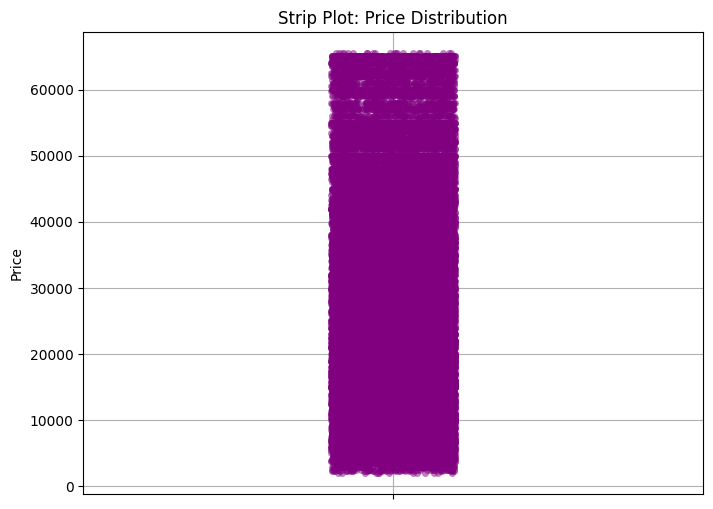

In [33]:
# Redoing the strip plot 

plt.figure(figsize=(8, 6))
sns.stripplot(data = train_data, y = 'price', jitter=True, color='purple', alpha = 0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The above strip plot shows there are no longer any outliers 

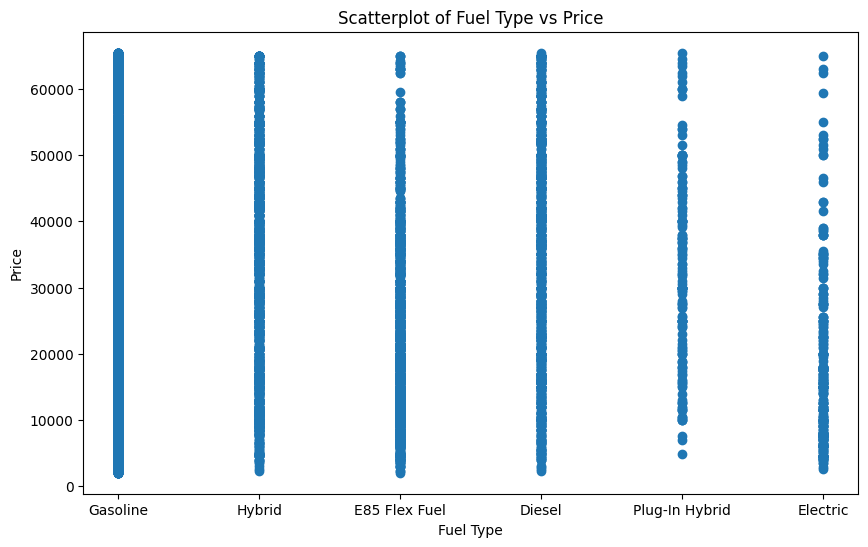

In [34]:
# Plot fuel price with respect to price 

plt.figure(figsize=(10, 6))
plt.scatter(train_data['fuel_type'], train_data['price'])
plt.title('Scatterplot of Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Gasoline'),
  Text(1, 0, 'Hybrid'),
  Text(2, 0, 'E85 Flex Fuel'),
  Text(3, 0, 'Diesel'),
  Text(4, 0, 'Plug-In Hybrid'),
  Text(5, 0, 'Electric')])

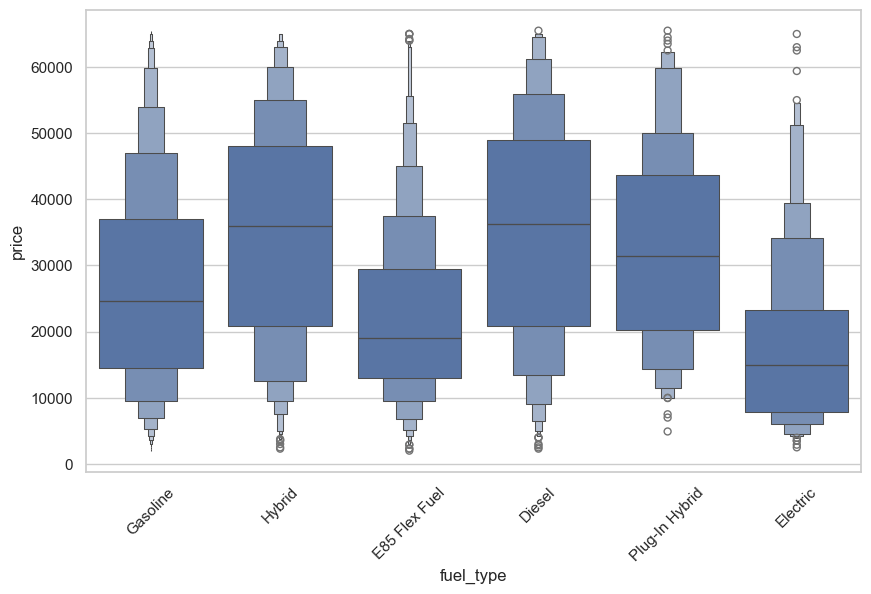

In [35]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxenplot(x = train_data.fuel_type, y=train_data.price, data= train_data)
plt.xticks(rotation = 45)


In [36]:
# Calculate Quantiles 

Q1 = train_data.price.quantile(0.25)
Q2 = train_data.price.median()
Q3 = train_data.price.quantile(0.75)

# Define a function to categorize data points into quantiles 
def categorized_quantile(value):
    if value < Q1:
        return "Q1 (25%)"
    elif value < Q2:
        return "Q2 (50%)"
    elif value < Q3:
        return "Q3 (75%)"
    else:
        return "Q4 (100%)"
    

In [37]:
# Apply the categorized_quatile function to the original price column 
train_data['quartile'] =  train_data.price.apply(categorized_quantile)

# Count the number of data points in each quartile 
quartile_counts = train_data.quartile.value_counts().reset_index()
quartile_counts.columns = ['quartile', 'count']
# Display Quartile distribution table
print(quartile_counts)

    quartile  count
0   Q3 (75%)  12028
1   Q2 (50%)  11978
2  Q4 (100%)  11920
3   Q1 (25%)  11752


In [38]:
train_data.describe()

,milage,price,horsepower,engine_displacement,age
count,47678.000000,47678.000000,47678.000000,47678.000000,47678.000000
mean,79017.969504,26943.079219,3.649098,318.030682,9.496183
std,49418.154681,15404.132778,1.314001,95.406901,5.512482
min,100.000000,2000.000000,0.650000,76.000000,0.000000
25%,42653.000000,14500.000000,2.700000,252.000000,5.000000
50%,72329.000000,24900.000000,3.500000,310.000000,8.000000
75%,108000.000000,37475.500000,4.400000,375.000000,13.000000
max,405000.000000,65500.000000,8.400000,1020.000000,50.000000


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47678 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                47678 non-null  object 
 1   milage               47678 non-null  int64  
 2   fuel_type            47678 non-null  object 
 3   transmission         47678 non-null  object 
 4   ext_col              47678 non-null  object 
 5   int_col              47678 non-null  object 
 6   accident             47678 non-null  object 
 7   clean_title          47678 non-null  object 
 8   price                47678 non-null  int64  
 9   horsepower           47678 non-null  float64
 10  engine_displacement  47678 non-null  float64
 11  age                  47678 non-null  int64  
 12  quartile             47678 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.1+ MB


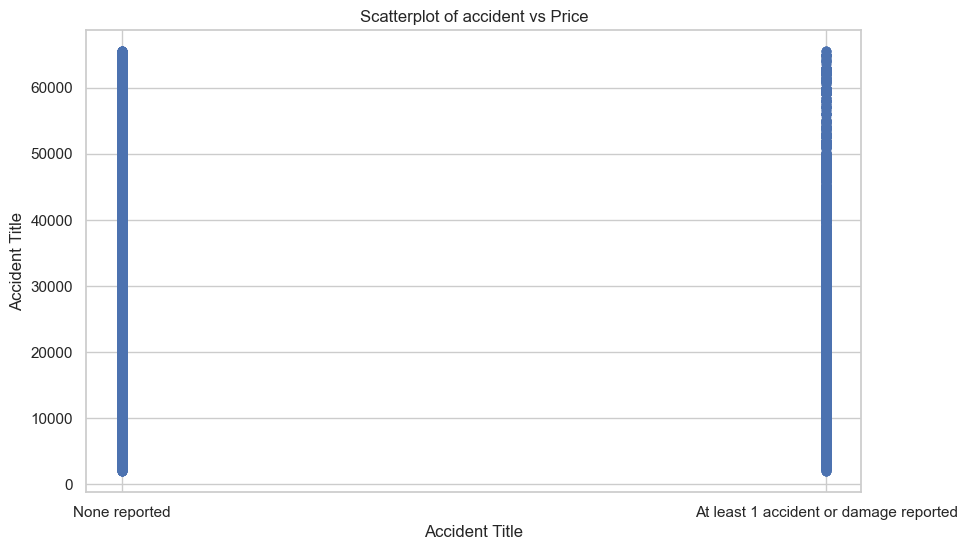

In [40]:
# Scatterplot of clean title vs price 

plt.figure(figsize=(10, 6))
plt.scatter(train_data.accident, train_data.price)
plt.title('Scatterplot of accident vs Price')
plt.xlabel('Accident Title')
plt.ylabel('Price')
plt.show()

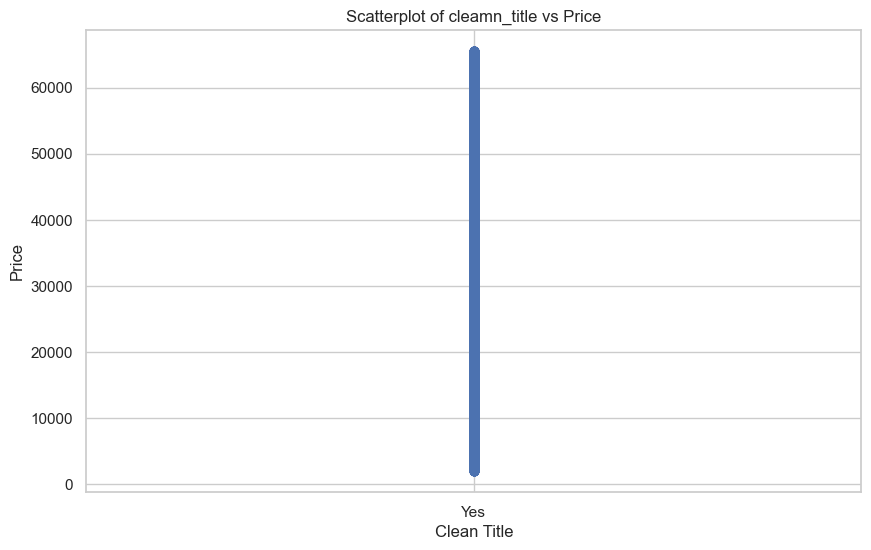

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data.clean_title, train_data.price)
plt.title('Scatterplot of cleamn_title vs Price')
plt.xlabel('Clean Title')
plt.ylabel('Price')
plt.show()

In [44]:
# from the above two scatterplots the accident and clean_title columns have no effect on the price of the cars
train_data.drop(['clean_title', 'accident', 'quartile'], axis=1, inplace=True)

KeyError: "['clean_title', 'accident'] not found in axis"

In [46]:
train_data.drop('quartile', axis=1, inplace=True)

In [47]:
train_data

,brand,milage,fuel_type,transmission,ext_col,int_col,price,horsepower,engine_displacement,age
0,Ford,74349,Gasoline,10-Speed A/T,Blue,Gray,11000,3.5,375.0,6
1,BMW,80000,Gasoline,6-Speed M/T,Black,Black,8250,3.0,300.0,17
2,Jaguar,91491,Gasoline,6-Speed A/T,Purple,Beige,15000,4.2,300.0,15
3,BMW,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,63500,3.0,335.0,2
4,Pontiac,111000,Gasoline,A/T,White,Black,7850,3.8,200.0,23
...,...,...,...,...,...,...,...,...,...,...
54267,Land,69000,Hybrid,Transmission w/Dual Shift Mode,Silver,Black,32500,3.0,395.0,4
54268,BMW,29000,Gasoline,8-Speed A/T,White,Brown,29000,4.4,445.0,7
54269,Audi,94634,E85 Flex Fuel,6-Speed A/T,Black,Black,6500,2.0,220.0,9
54270,Porsche,40989,Gasoline,Transmission w/Dual Shift Mode,White,Black,18950,3.6,420.0,11


In [48]:
train_data.int_col.unique()

array(['Gray', 'Black', 'Beige', 'Brown', 'Silver', 'Jet Black', 'White',
       '–', 'Red', 'Blue', 'Medium Stone', 'Ash', 'Ebony', 'Shara Beige',
       'Tan', 'Global Black', 'Orange', 'Saddle Brown', 'Nero Ade',
       'Light Slate', 'Gold', 'Camel', 'Hotspur Hide', 'Charcoal',
       'Satin Black', 'Deep Chestnut', 'Diesel Gray / Black',
       'White / Brown', 'AMG Black', 'Parchment', 'Shale',
       'Canberra Beige', 'Black Onyx', 'Ebony / Pimento', 'Rhapsody Blue',
       'Rioja Red', 'Black / Express Red', 'Deep Garnet', 'Sandstone',
       'Dark Ash', 'Deep Cypress', 'Black / Stone Grey', 'Chestnut',
       'Navy Pier', 'Mistral Gray / Raven', 'Green', 'Dark Gray', 'Amber',
       'Medium Earth Gray', 'Charcoal Black', 'Ceramic', 'Walnut',
       'Hotspur', 'Black / Saddle', 'Mesa', 'Obsidian Black', 'Macchiato',
       'Whisper Beige', 'Graphite', 'Yellow', 'Medium Light Camel',
       'Nero', 'Nougat Brown', 'Ebony Black', 'Espresso', 'Cappuccino',
       'Portland', 'Medi

In [49]:
train_data.ext_col.unique()

array(['Blue', 'Black', 'Purple', 'Gray', 'White', 'Red', 'Silver',
       'Summit White', 'Platinum Quartz Metallic', 'Green', 'Orange',
       'Lunar Rock', 'Red Quartz Tintcoat', 'Gold', 'Jet Black Mica',
       'Delmonico Red Pearlcoat', 'Brown', 'Rich Garnet Metallic',
       'Stellar Black Metallic', 'Yellow', 'Metallic',
       'Ice Silver Metallic', 'Agate Black Metallic',
       'Rosso Mars Metallic', 'Beige', 'White Clearcoat',
       'Santorini Black Metallic', 'DB Black Clearcoat',
       'Snowflake White Pearl', 'Glacial White Pearl',
       'Maximum Steel Metallic', '–', 'Oxford White',
       'Velvet Red Pearlcoat', 'Beluga Black', 'Blue Reflex Mica',
       'Sparkling Silver', 'Black Clearcoat', 'Cobra Beige Metallic',
       'Soul Red Crystal Metallic', 'Bright White Clearcoat',
       'Shimmering Silver', 'Midnight Black Metallic',
       'Cajun Red Tintcoat', 'Cirrus Silver Metallic', 'Blu',
       'Burnished Bronze Metallic', 'Diamond Black',
       'White Diamond T

In [51]:
train_data.drop(['int_col', 'ext_col'], axis=1, inplace=True)

In [52]:
train_data.describe()

,milage,price,horsepower,engine_displacement,age
count,47678.000000,47678.000000,47678.000000,47678.000000,47678.000000
mean,79017.969504,26943.079219,3.649098,318.030682,9.496183
std,49418.154681,15404.132778,1.314001,95.406901,5.512482
min,100.000000,2000.000000,0.650000,76.000000,0.000000
25%,42653.000000,14500.000000,2.700000,252.000000,5.000000
50%,72329.000000,24900.000000,3.500000,310.000000,8.000000
75%,108000.000000,37475.500000,4.400000,375.000000,13.000000
max,405000.000000,65500.000000,8.400000,1020.000000,50.000000


In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47678 entries, 0 to 54272
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                47678 non-null  object 
 1   milage               47678 non-null  int64  
 2   fuel_type            47678 non-null  object 
 3   transmission         47678 non-null  object 
 4   price                47678 non-null  int64  
 5   horsepower           47678 non-null  float64
 6   engine_displacement  47678 non-null  float64
 7   age                  47678 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.3+ MB


### Data Grouping 

In [55]:
# create a group of transmission, fuel_type and price
train_group = train_data.groupby(['transmission', 'fuel_type'])['price'].mean().reset_index()
# Create pivot table 
train_pivot = train_group.pivot(index = 'transmission', columns= 'fuel_type', values='price')
train_data.pivot

<bound method DataFrame.pivot of          brand  milage      fuel_type                    transmission  price  \
0         Ford   74349       Gasoline                    10-Speed A/T  11000   
1          BMW   80000       Gasoline                     6-Speed M/T   8250   
2       Jaguar   91491       Gasoline                     6-Speed A/T  15000   
3          BMW    2437         Hybrid  Transmission w/Dual Shift Mode  63500   
4      Pontiac  111000       Gasoline                             A/T   7850   
...        ...     ...            ...                             ...    ...   
54267     Land   69000         Hybrid  Transmission w/Dual Shift Mode  32500   
54268      BMW   29000       Gasoline                     8-Speed A/T  29000   
54269     Audi   94634  E85 Flex Fuel                     6-Speed A/T   6500   
54270  Porsche   40989       Gasoline  Transmission w/Dual Shift Mode  18950   
54272     Audi   35000         Hybrid                     8-Speed A/T  37499   

      

In [56]:
train_data.transmission.unique()

array(['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', 'Transmission Overdrive Switch',
       '9-Speed Automatic', '7-Speed M/T', '8-Speed A/T',
       '6-Speed Automatic', 'M/T', '5-Speed Automatic',
       'CVT Transmission', '9-Speed A/T', '10-Speed Automatic',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic',
       '7-Speed DCT Automatic', 'Automatic CVT', '7-Speed Automatic',
       '4-Speed Automatic', '7-Speed Automatic with Auto-Shift',
       '1-Speed A/T', '6-Speed Automatic with Auto-Shift',
       '6-Speed Manual', '8-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O',
       '7-Speed Manual', 'CVT-F', '1-Speed Automatic', 'F',
       'SCHEDULED FOR OR IN PRODUCTION', '6 Speed At/Mt',
       '8-Speed Manual', '6 Speed Mt', '2-Speed A/T', '–',
       '10-Speed Automatic with Overdrive', '6-Speed'], dtype=object)

In [57]:
train_data.isna().sum()

brand                  0
milage                 0
fuel_type              0
transmission           0
price                  0
horsepower             0
engine_displacement    0
age                    0
dtype: int64

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

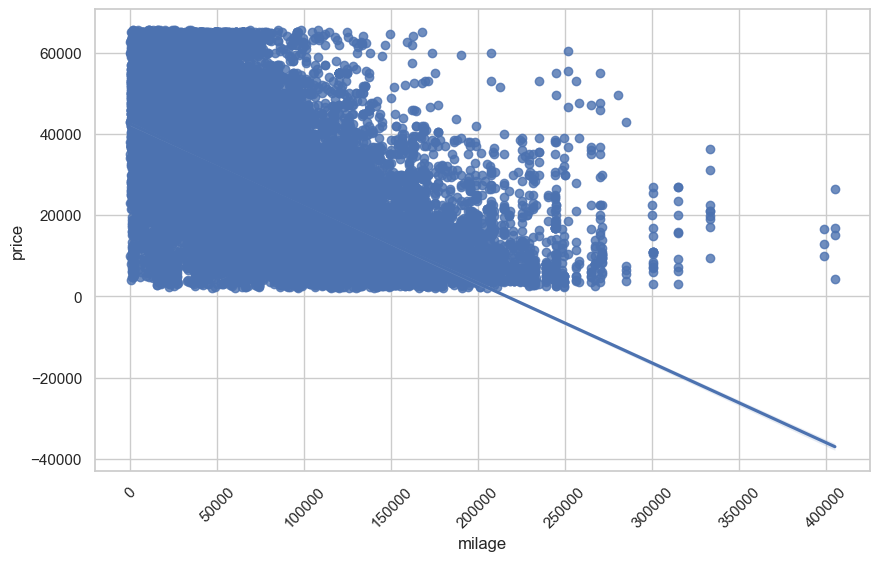

In [58]:
# Making a regression plot of milage vs price

plt.figure(figsize=(10,6))
sns.regplot(x='milage', y='price', data = train_data)
plt.xticks(rotation=45)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

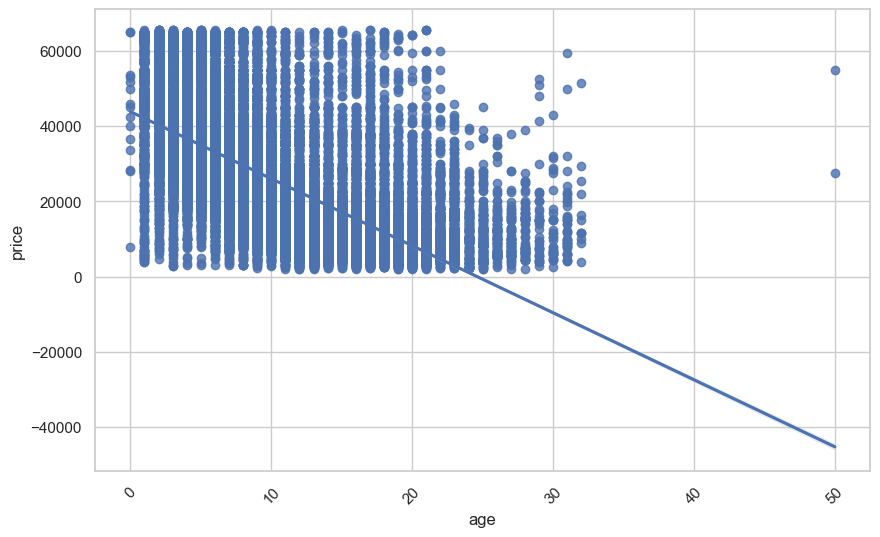

In [59]:
# making a regression plot between age and price
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y = 'price', data= train_data)
plt.xticks(rotation=45)

(array([-20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80')])

<Figure size 1000x600 with 0 Axes>

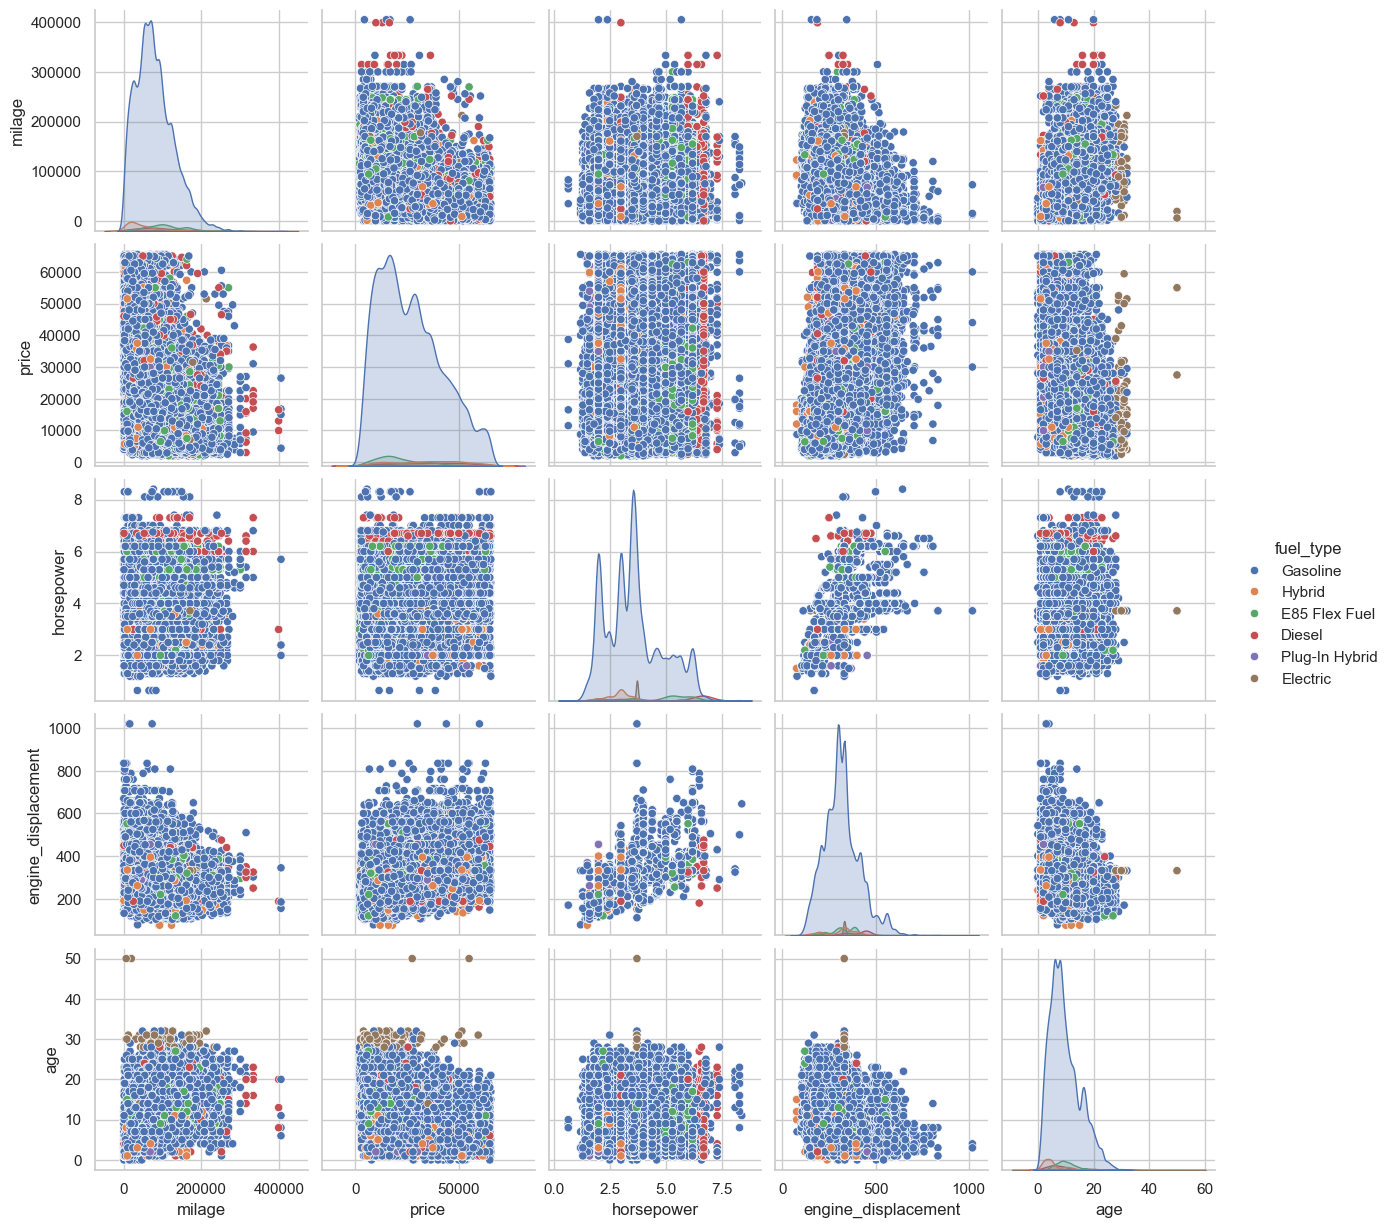

In [60]:
# Draw a pairplot of all the features in train_data except brand, transmission
plt.figure(figsize=(10, 6))
sns.pairplot(train_data, hue='fuel_type')
plt.xticks(rotation=45)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

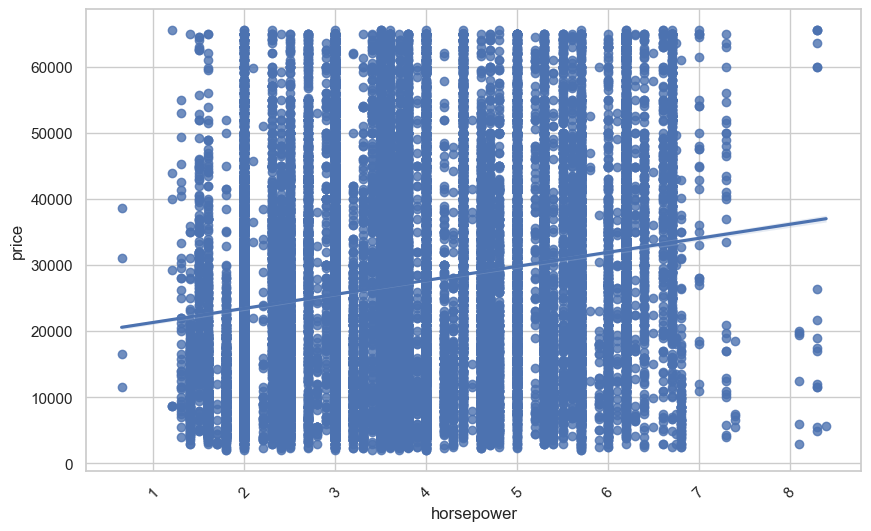

In [61]:
# Regression plot of Horsepower vs price

plt.figure(figsize=(10, 6))
sns.regplot(x='horsepower', y='price', data=train_data)
plt.xticks(rotation=45)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

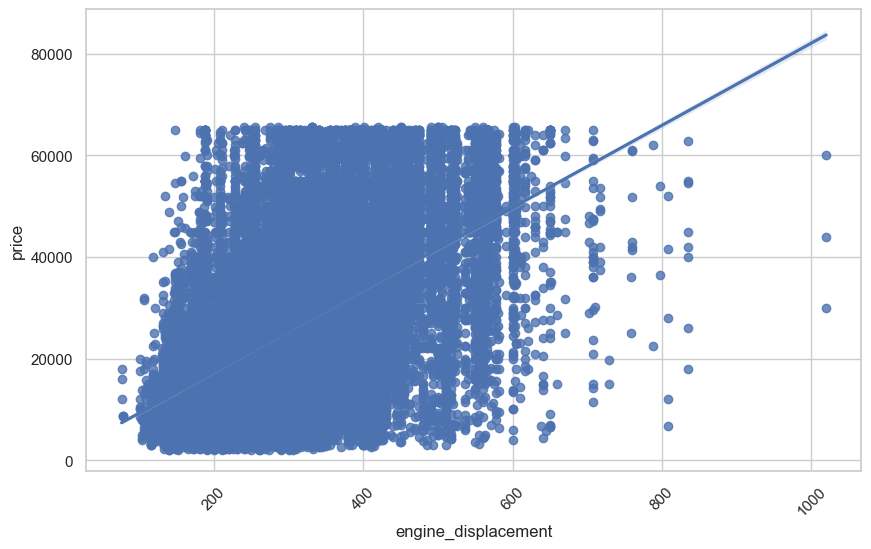

In [63]:
# Scatterplot of engine_displacement vs price
plt.figure(figsize=(10, 6))
sns.regplot(x='engine_displacement', y = 'price', data = train_data)
plt.xticks(rotation=45)

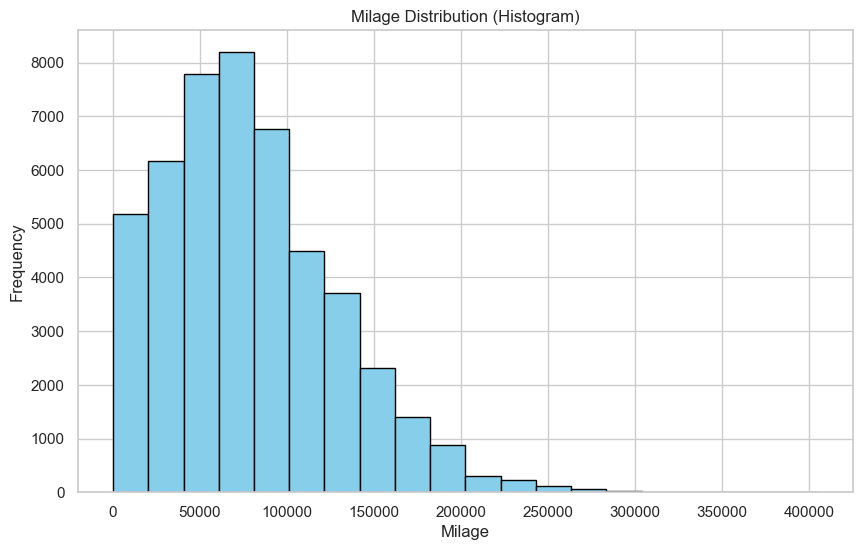

In [64]:
# Create a histogram for the milage column
plt.figure(figsize=(10, 6))
plt.hist(train_data.milage, bins=20, color='skyblue', edgecolor = 'black')
plt.title('Milage Distribution (Histogram)')
plt.xlabel('Milage')
plt.ylabel('Frequency')
plt.show()

In [66]:
# from scipy import stats
# # To find pearson coefficient - horsepower and price
# pearson_coef, p_value = stats.pearsonr(train_data.horsepower), train_data.price

# print("The Pearson Correlation Coefficient is", pearson_coef, " with a p_value of P =", p_value)

## Model Development

In [67]:
train_data.fuel_type.value_counts()

fuel_type
Gasoline          43613
E85 Flex Fuel      1435
Hybrid             1323
Diesel              889
Electric            270
Plug-In Hybrid      148
Name: count, dtype: int64

In [72]:
# import category encoders

from category_encoders import TargetEncoder
encoder = TargetEncoder(cols =['fuel_type'])
train_data['fuel_type_target'] = encoder.fit_transform(train_data.fuel_type, train_data.price)
train_data.head()

ModuleNotFoundError: No module named 'category_encoders'

In [74]:
from category_encoders import TargetEncoder

# Sample data (replace with your data)
data = pd.DataFrame({'category': ['A', 'B', 'A', 'C', 'B'],
                     'target': [10, 20, 15, 25, 18]})

# Create the target encoder
encoder = TargetEncoder(cols='category', target='target')

# Encode the categorical feature
encoded_data = encoder.fit_transform(data)
print(encoded_data)

ModuleNotFoundError: No module named 'category_encoders'

In [75]:
train_cpy = train_data.copy()

In [77]:
train_cpy.head().T

,0,1,2,3,4
brand,Ford,BMW,Jaguar,BMW,Pontiac
milage,74349,80000,91491,2437,111000
fuel_type,Gasoline,Gasoline,Gasoline,Hybrid,Gasoline
transmission,10-Speed A/T,6-Speed M/T,6-Speed A/T,Transmission w/Dual Shift Mode,A/T
price,11000,8250,15000,63500,7850
horsepower,3.5,3.0,4.2,3.0,3.8
engine_displacement,375.0,300.0,300.0,335.0,200.0
age,6,17,15,2,23


In [78]:
train_cpy.isna().sum()

brand                  0
milage                 0
fuel_type              0
transmission           0
price                  0
horsepower             0
engine_displacement    0
age                    0
dtype: int64

In [79]:
train_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47678 entries, 0 to 54272
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                47678 non-null  object 
 1   milage               47678 non-null  int64  
 2   fuel_type            47678 non-null  object 
 3   transmission         47678 non-null  object 
 4   price                47678 non-null  int64  
 5   horsepower           47678 non-null  float64
 6   engine_displacement  47678 non-null  float64
 7   age                  47678 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.3+ MB


In [80]:
for label, content in train_cpy.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        # Convert all object and string data types into categories 
        train_cpy[label] = content.astype('category').cat.as_ordered()

In [81]:
train_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47678 entries, 0 to 54272
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   brand                47678 non-null  category
 1   milage               47678 non-null  int64   
 2   fuel_type            47678 non-null  category
 3   transmission         47678 non-null  category
 4   price                47678 non-null  int64   
 5   horsepower           47678 non-null  float64 
 6   engine_displacement  47678 non-null  float64 
 7   age                  47678 non-null  int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 2.3 MB


In [82]:
# Turn categorical values into numbers 
for label, content in train_cpy.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_cpy[label] = pd.Categorical(content).codes + 1

In [83]:
train_cpy.head()

,brand,milage,fuel_type,transmission,price,horsepower,engine_displacement,age
0,14,74349,4,3,11000,3.5,375.0,6
1,5,80000,4,19,8250,3.0,300.0,17
2,21,91491,4,15,15000,4.2,300.0,15
3,5,2437,5,42,63500,3.0,335.0,2
4,39,111000,4,33,7850,3.8,200.0,23


In [85]:
# split data into train and validation set 
X = train_cpy.drop("price", axis=1)
y = train_cpy.price

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.002, random_state=42)

In [103]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47582, 7), (96, 7), (47582,), (96,))

In [104]:
# initialising classifier models 
clf1 = RandomForestRegressor()
clf2 = LinearRegression()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

LinearRegression()

In [105]:
clf1.score(X_val, y_val)

0.6101036585707422

In [101]:
clf2.score(X_val, y_val)

0.5260450919870809

In [106]:
# Setting a random seed 
np.random.seed(42)

In [ ]:
# Doing Hyperparameter tuning
hyper_parameters ={
    
}